# Time Series

A time series is broadly classified into three categories of long-term fluctuations, short-term or periodic fluctuations, and random variations. A long-term variation or a trend shows the general tendency of the data to increase or decrease during a long period of time. The variation may be gradual but it is inevitably present.

The patern of a time series is described by 3 deterministic components:

The trend, wich changes with time and it does not repeat itself and it describes the direction in wich the series is going;
the cyclic component;
the seasonal component.

# Autoregressive (AR)

### AR method models the next step in sequence as a linear function of observation at prior time steps.
AR(1) - First order auto-regressive model.
The method is suitable for univariate time series without trend and seasonal components.

An auto-regressive model is when a value from a time series is regressed on previous values from that time series.
eg. y(t) on y(t-1)

In even simpler words "Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step."

The input variable in this are taken as observations at previous time steps called lag variables

We can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2) using the following regression model.
X(t+1) = b0 + b1 * X(t-1) + b2 * X(t-2)

As the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).

In [1]:
# Importing libraries
from statsmodels.tsa.ar_model import AR
from random import random

# Generation of dataset using random function
data = [x + random() for x in range(1,100)]

# Initialize and fit AR model
model = AR(data)
model_fit = model.fit()

# Predict the next value in the series
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.4945034]


# Moving Average (MA)

### Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

The 1st order MA model can be described as :
x(t) = (mu) + w(t) + theta(1)*w(t-1)

It is different from calculating the moving average of the time series.
The method is suitable for univariate time series without trend and seasonal components.

In [2]:
from statsmodels.tsa.arima_model import ARMA
from random import random

data = [x + random() for x in range(1,100)]

model = ARMA(data, order=(0,1))
model_fit = model.fit(disp=False)

# Predict the next value in the series
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[73.98628446]


## Autocorrelation

Before understanding auto-correlation, let's understand what is correlation.
Correlation is relationship between any two variables that happen to occur together. 
If both the variables change in same direction i.e. either they increase together or decrease together, then they have a positive correlation. But if they move in opposite direction i.e. one increases and the other decreases then they have a negative correlation.

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

As the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

### Let's explore how we can find auto-correlation in data using the dataset

In [3]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot

# Import Dataset
series = pd.Series.from_csv('daily-minimum-temperatures.csv', header=0)

# Convert values to float from str
for i in range(0,len(series)):
    series[i] = float(series[i])
# Printing out first 5 values of dataset
series.head()

# Plotting the dataset
series.plot()
pyplot.show()

/home/deepshikha/.local/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


<Figure size 640x480 with 1 Axes>

To check for the autocorrelation, we can plot  observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library.

But there is an easier way.

Pandas provides a built-in plot to do exactly this, called the lag_plot() function.

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """


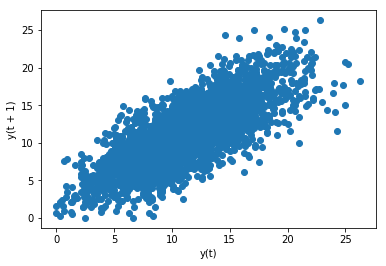

In [4]:
# Importing lag_plot
from pandas.tools.plotting import lag_plot

# Plotting the lagged values of the series
lag_plot(series)
pyplot.show()

Another way to find auto-correlation is to calculate the Pearson Correlation Coefficient

Wikipedia says - "Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations. The form of the definition involves a "product moment", that is, the mean (the first moment about the origin) of the product of the mean-adjusted random variables; hence the modifier product-moment in the name."

It's value lies between -1 and +1. -1 means total negative linear correlation, 0 means no linear correlation and +1 means positive linear correlation.

In [5]:
# Converting the pandas series to a dataframe 
values = pd.DataFrame(series.values)
# Putting lag values
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# Finding auto-correlation 
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77362
t+1  0.77362  1.00000


Here, the lag value = 1 and the result shows that there is a positive correlation between the observations with Pearson Correlation Coefficient values as 0.77

## Auto-correlation Plots

Auto-correlation plots give an idea of which lag variables can be good for use in a predictive model and how relation between observation and historic values changes over time.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

These plots can be easily implemented using pandas library

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


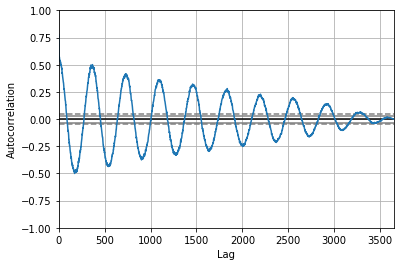

In [6]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

It can also be implemented using statsmodels library's plot_acf() function as a line plot

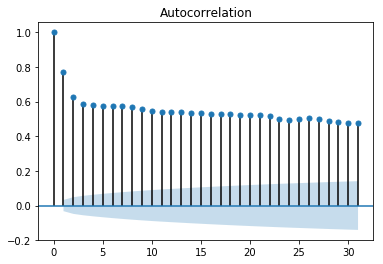

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()

## Persistence Model

It is the simplest model that can be used to make prediction with time series data. 

The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the next time step (t+1).

A persistent series is one where the value of the variable at a certain date is closely related to the previous value. The two basic measures of persistence are the autocovariance and the autocorrelation coefficient.

Test MSE: 3.423


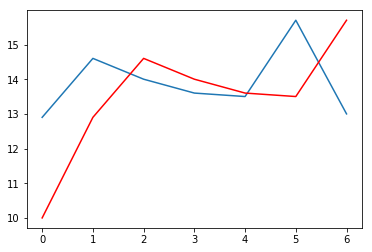

In [8]:
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## Auto-Regression Model

An autoregression model is a linear regression model that uses lagged variables as input variables.

We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use.

Alternately, the statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

Lag: 29
Coefficients: [ 0.55974632  0.58709415 -0.09246698  0.05085627  0.03908131  0.04156931
  0.02416716  0.04398952  0.01499416  0.03491271  0.00079989  0.00560537
  0.01592083  0.02563525  0.0019312   0.0257546   0.00842032  0.0099442
  0.03284872 -0.00944755  0.02473185  0.01840579  0.01422356 -0.01669205
 -0.00127444  0.01253475  0.0206685   0.01062753  0.00137506  0.00296821]
predicted=11.897334, expected=12.900000
predicted=13.065633, expected=14.600000
predicted=13.542059, expected=14.000000
predicted=13.282815, expected=13.600000
predicted=13.118024, expected=13.500000
predicted=13.152012, expected=15.700000
predicted=13.157325, expected=13.000000
Test MSE: 1.476


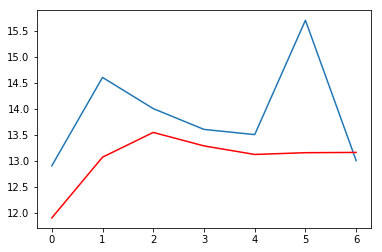

In [9]:
from statsmodels.tsa.ar_model import AR
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

As you can see Auto-Regression Model results in less mean squared error than Persistence Model.

The statsmodels API does not make it easy to update the model as new observations become available.

One way would be to re-train the AR model each day as new observations become available, and that may be a valid approach, if not computationally expensive.

An alternative would be to use the learned coefficients and manually make predictions. This requires that the history of 29 prior observations be kept and that the coefficients be retrieved from the model and used in the regression equation to come up with new forecasts.

The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at t-1 to t-n. We simply need to use them in the right order on the history of observations

## Moving Average

Moving Average method is used to observe change in the trend of the data. For eg. in layman terms, moving average can be used in a series of data where you just calculate average. Let's say the series is as follows: 1, 2, 6, 3, 7, 8. So you start with the first element and take a window size of 3. So firstly, you take first 3 elements and take out the average. In the above series, the average of first three elements will be (2 + 2 + 6)/3 = 3. Then you move the window forward by one step and take 2nd, 3rd and 4th element and calculate the average. Thereafter, the window shifts again and takes up 3rd, 4th and 5th element and calculates the average. Now how this will help us observe the trend is that the average will either increase all of a sudden or drop and there you will realize that the trend in the series has changed.

So, it measures the trend by eliminating the changes or the variations by means of a moving average. The simplest of the mean used for the measurement of a trend is the arithmetic means (averages) that I have used in the example above.

The moving average of a period m is a series of successive averages of m terms at a time. The data set used for calculating the average starts with first, second, third and etc. at a time and m data taken at a time.

The first average is the mean of the first m terms. The second average is the mean of the m terms starting from the second data up to (m + 1)th term. Similarly, the third average is the mean of the m terms from the third to (m + 2) th term and so on.

If the period, m is odd i.e., m is of the form (2k + 1), the moving average is placed against the mid-value of the time interval it covers, i.e., t = k + 1. On the other hand, if m is even i.e., m = 2k, it is placed between the two middle values of the time interval it covers, i.e., t = k and t = k + 1.

When the period of the moving average is even, then we need to synchronize the moving average with the original time period. It is done by centering the moving averages i.e., by taking the average of the two successive moving averages.

There are various problems associated with Moving Average as well:
1) It assumes that the trend is linear which is not always the case.
2) It does not provide trend values for all the terms.
3) It cannot be used for forecasting future trend which is like the main purpose of time series analysis.

The moving average algorithm is used only on time series that DOESN'T have a trend. So, the only case where Moving Average can be used to forecast new values will be on a dataset that does not have a trend.

We will start with Moving Average using another dataset named hospital admissions dataset

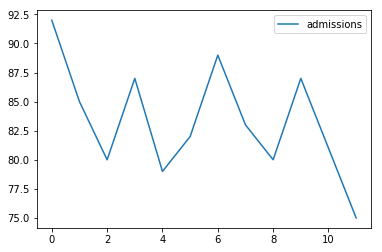

In [10]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset and plotting it 
dataset = pd.read_csv("hospital_admissions.csv")
dataset.plot()
plt.show()

In [11]:
optimal_n = None
best_mse = None
db = dataset.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)
print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Best MSE = %s" % best_mse)
print("Optimal n = %s" % optimal_n)

MSE = [17.99999887 24.6328125  24.92571524 21.48610899]
Best MSE = 17.99999886972364
Optimal n = 3


In [12]:
print("MA = %s" % np.mean(db[:, 0][len(db) - optimal_n:len(db)]))

MA = 81.0


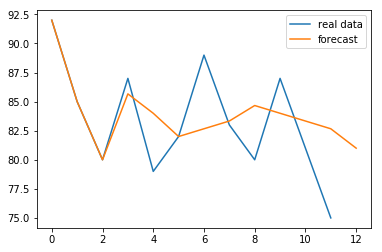

In [13]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()

While working with Time Series Data, multiple algorithms should be used to forecast data and then you should settle for the one which has the minimum MSE (Mean Squared Error)

## Decomposing Time Series Data into Trend and Seasonality

A time series data is generally composed of trend, level, noise and seasonality components.

The time series data should be broken down into systematic and non-systematic components. Systematic components have consistency so it can be described and modeled. The non-systematic components cannot be directly modeled.

The four components of time series data can be described as follows:
Level - it is the average values in the series.
Trend - the increasing or decreasing value in the series.
Seasonality - the repeating short term cycle in time series.
Noise - it is the random variations in the dataset. Generally, the term noise is used in the context of the dataset when there are some rows or values in the dataset that does not matches with the  rest of the dataset.

A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

These components are generally considered either added or multiplicated.

## Additive Model

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

It basically says that value of time series at any time t is equal to the sum of all the components of time series.

y(t) = Level + Trend + Seasonality + Noise

## Multiplicative Model

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

It basically says that value of time series at any time t is equal to the product of all the components of time series.

y(t) = Level * Trend * Seasonality * Noise

## Time Series Decomposition

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

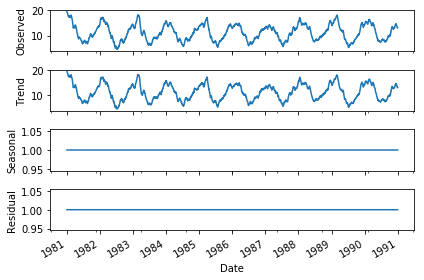

In [66]:
# Importing Libraries
import statsmodels.api as sm
from scipy.signal import savgol_filter

# Importing Dataset
temp_data = pd.read_csv('daily-minimum-temperatures.csv', header=0)

# Removing None values
temp_value = pd.Series.to_frame(temp_data['temperatures']).dropna(axis=0, how='all')
temp_value = temp_value.values
# Converting it into 1D array
temp_value = temp_value.ravel()
# Applying savgol filter
temp_value = savgol_filter(temp_value, 51, 3, mode='nearest')
temp_value = pd.Series(temp_value)
# Updating temperature column in the dataframe
temp_data['temperature'] = temp_value
# Defining Freq for Seasonal Decompose
decompfreq = 1
decompfreq = int(decompfreq)
asd = pd.to_datetime(temp_data.Date)
temp_data.Date = asd
temp_data.set_index('Date', inplace=True)
# Seasonal Decompose on the final Dataframe
res = sm.tsa.seasonal_decompose(temp_data['temperature'].interpolate(), freq=decompfreq, model='multiplicative')
resplot = res.plot()
plt.show()
# Printing out all four component values
# print('Trend', res.trend)
# print('Seasonal', res.seasonal)
# print('Residual', res.resid)
# print('Observed', res.observed)

As we can see that the entire series was taken as trend and there is no seasonal component in the data.
We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.